In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import Markdown, display

from os.path import join

In [9]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(join(data_root, "lifesat", "lifesat.csv"))

In [10]:
lifesat.sort_values(by="Life satisfaction", ascending=False)

,Country,GDP per capita (USD),Life satisfaction
25,Denmark,55938.212809,7.6
17,Finland,47260.800458,7.6
23,Iceland,52279.728851,7.5
24,Netherlands,54209.563836,7.4
16,Canada,45856.625626,7.4
15,New Zealand,42404.393738,7.3
20,Sweden,50683.323510,7.3
19,Australia,48697.837028,7.3
11,Israel,38341.307570,7.2
22,Austria,51935.603862,7.1


In [12]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

X.shape, y.shape

((27, 1), (27, 1))

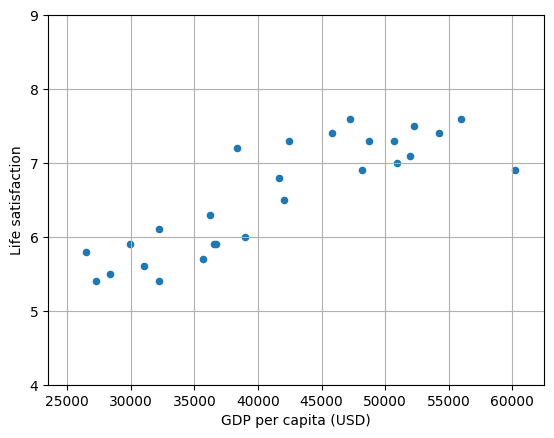

In [14]:
lifesat.plot(kind="scatter", grid=True,  x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

We can see a linear trend here. So we can model this problem with a *linear model*.

$Life \ satisfaction = \theta_{0} + \theta_{1} * GDP$

In [20]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [38]:
t0 = round(model.intercept_[0], 3)
t1 = model.coef_[0][0]

t0, t1

(3.749, 6.778899694341222e-05)

In [39]:
markdown = f"""
$Life \ satisfaction = {t0} + {t1} * GDP$
"""

display(Markdown(markdown))


$Life \ satisfaction = 3.749 + 6.778899694341222e-05 * GDP$


In [41]:
def life_satisfaction(x, t0, t1):
    return t0 + t1 * x

In [48]:
yhat = life_satisfaction(X, t0, t1)
yhat

array([[5.542452  ],
       [5.59876401],
       [5.67318985],
       [5.77809374],
       [5.85098552],
       [5.93052819],
       [5.93439234],
       [6.16489284],
       [6.20400887],
       [6.22653456],
       [6.23902779],
       [6.34811878],
       [6.39223863],
       [6.57086134],
       [6.59787445],
       [6.62355132],
       [6.85757465],
       [6.95276226],
       [7.01710979],
       [7.05017753],
       [7.18477166],
       [7.20097557],
       [7.26966249],
       [7.29299038],
       [7.42381196],
       [7.54099534],
       [7.83231961]])

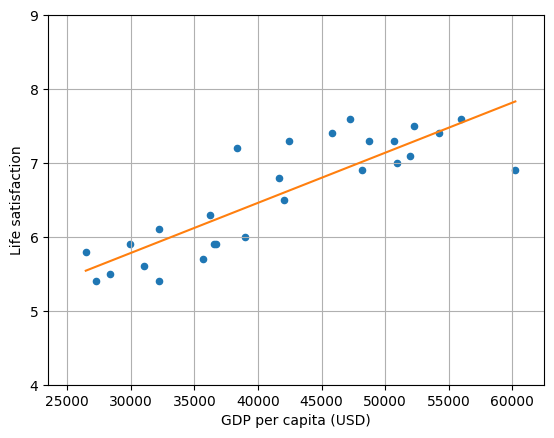

In [52]:
lifesat.plot(kind="scatter", grid=True,  x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X, yhat, color="#ff7f0e")
plt.show()

In [54]:
x_new = [[37_655.2]]
y_new = model.predict(x_new)
y_new

array([[6.30165767]])

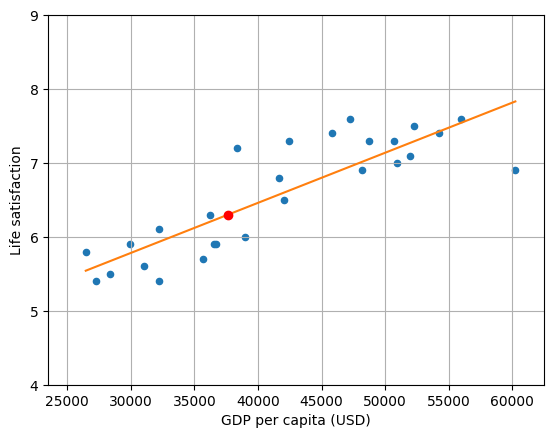

In [61]:
lifesat.plot(kind="scatter", grid=True,  x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X, yhat, color="#ff7f0e")
plt.plot(x_new, y_new, "ro")
plt.show()